In [1]:
# Load app functions
import app_functions as af
import os

# Load the test image paths
test_image_paths = os.listdir('../data/test-images/')

test_image_paths[:10]

/Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BDBC688-E93D-38EE-BBB2-E3BEEEAB3977> /Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <F37A8933-BE2B-34BD-AE9A-CEE18F73F614> /Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/Austin/opt/anaconda3/envs/dsan6600/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found.

['rodman.jpg',
 'bolt.jpg',
 'lance.jpg',
 '.DS_Store',
 'hamm.jpg',
 'tiger.jpg',
 'ali.jpg',
 'the-catch.jpg',
 'jokic.jpg',
 'tyler-adams.jpg']

In [53]:
# Get results on Rodman
rodman = af.get_all_results('../data/test-images/people.jpg', k=5)

rodman

Deep Lake Dataset in ../data/vector_stores/threshold_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/segmented_edge_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/dimmed_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/edge_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/raw_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/mask_vs already exists, loading from the storage


{'inputs': {'original_image': <PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=4032x3024>,
  'edges': <PIL.Image.Image image mode=L size=4032x3024>,
  'dimmed': <PIL.Image.Image image mode=RGB size=4032x3024>,
  'threshold': <PIL.Image.Image image mode=1 size=4032x3024>,
  'mask': <PIL.Image.Image image mode=L size=693x520>,
  'segmented_edge': <PIL.Image.Image image mode=L size=4032x3024>},
 'results': {'threshold_vs': {'images': [array([[[ 74,  72,  77],
            [ 68,  66,  71],
            [ 64,  62,  67],
            ...,
            [114, 111, 120],
            [113, 110, 119],
            [107, 104, 113]],
    
           [[ 65,  63,  68],
            [ 57,  55,  60],
            [ 52,  50,  55],
            ...,
            [104, 101, 110],
            [108, 105, 114],
            [111, 108, 117]],
    
           [[ 45,  43,  48],
            [ 37,  35,  40],
            [ 37,  35,  40],
            ...,
            [ 85,  82,  91],
            [ 89,  86,  95],
        

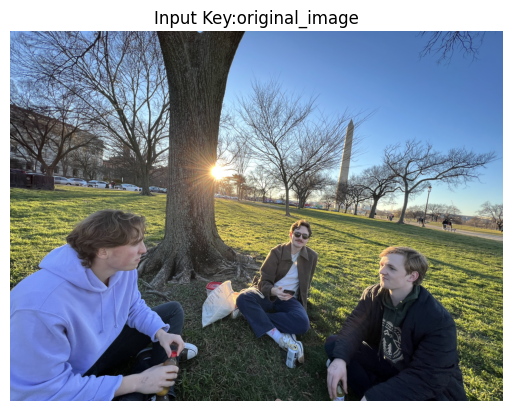

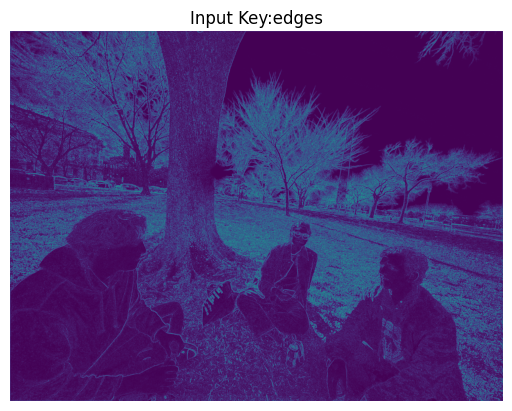

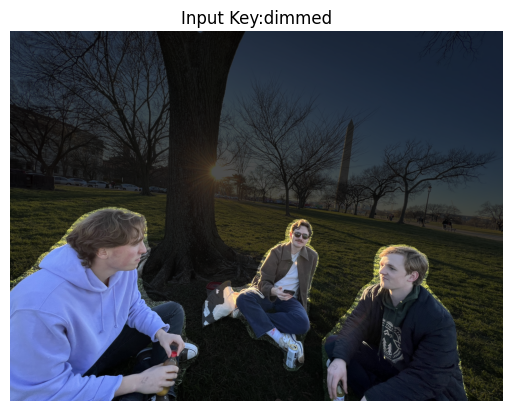

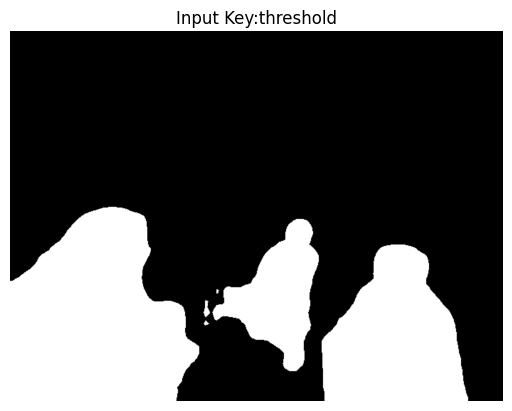

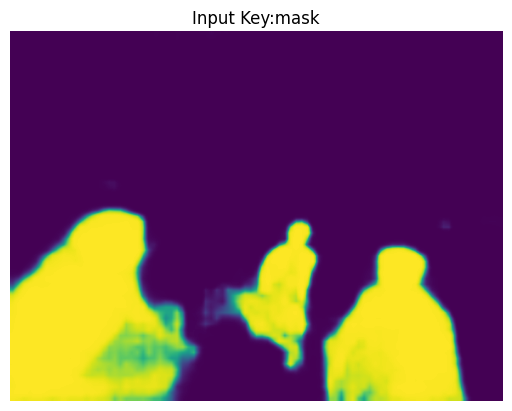

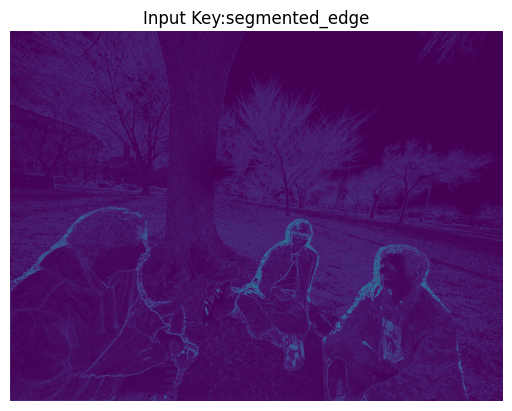

In [54]:
from matplotlib import pyplot as plt

# Get all input images
inputs = rodman['inputs'].keys()

for input in inputs:
    if input == 'original_image':
        plt.imshow(rodman['inputs'][input])
    else:
        plt.imshow(rodman['inputs'][input])

    plt.title("Input Key:" + input)
    plt.axis('off')
    plt.show()

# Results

In [55]:
# Print results options
rodman['results'].keys()

dict_keys(['threshold_vs', 'segmented_edge_vs', 'dimmed_vs', 'edge_vs', 'raw_vs', 'mask_vs'])

This should be all of the vector stores when they all work!

In [56]:
rodman['inputs'].keys()

dict_keys(['original_image', 'edges', 'dimmed', 'threshold', 'mask', 'segmented_edge'])

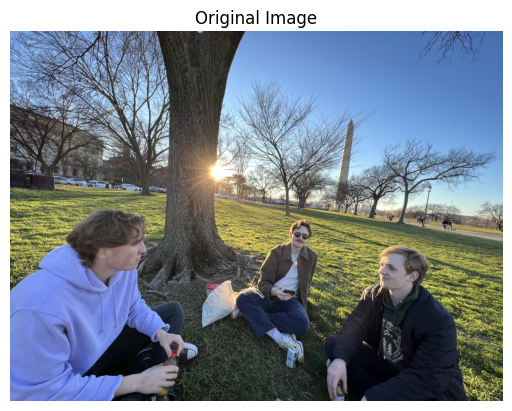

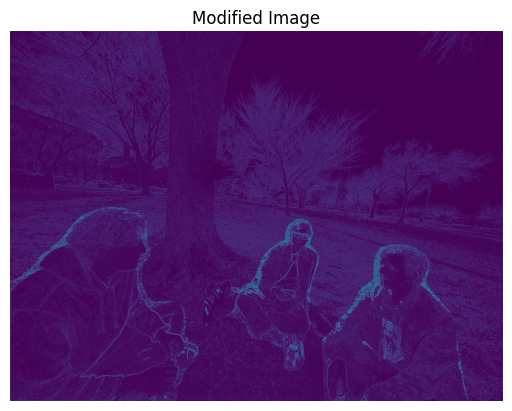

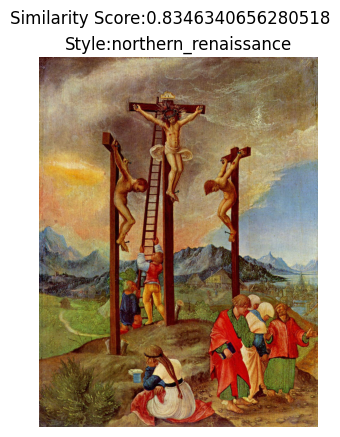

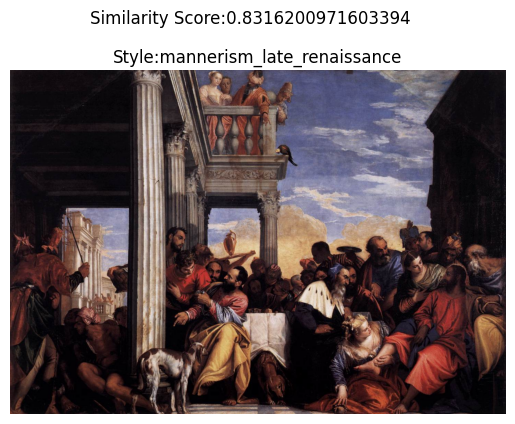

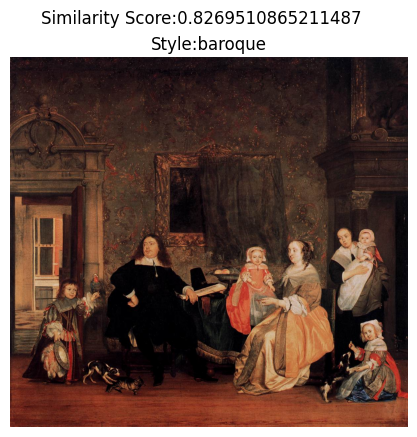

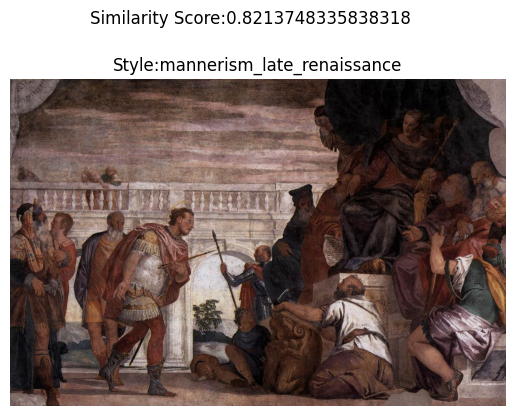

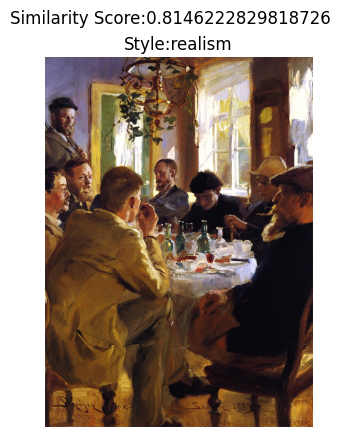

In [59]:
# If user has selected segmented edge as an example

# This should be the output of the dropdown
user_input = 'segmented_edge_vs'

# Get the results
results = rodman['results'][user_input]

# Show original image
plt.imshow(rodman['inputs']['original_image'])
plt.title("Original Image")
plt.axis('off')
plt.show()

# Show the modified image if we want to
if user_input != 'raw_vs':
    input_minus_vs = user_input.split('_vs')[0]
    if input_minus_vs == 'edge':
        input_minus_vs = 'edges'
    plt.imshow(rodman['inputs'][input_minus_vs])
    plt.title("Modified Image")
    plt.axis('off')
    plt.show()

# Show the results
for i in range(len(results['images'])):
    plt.imshow(results['images'][i])
    plt.title("Style:" + results['labels'][i])
    plt.suptitle("Similarity Score:" + str(results['similarities'][i]))
    plt.axis('off')
    plt.show()


Testing code from app_functions on bounding boxes to make sure they work.

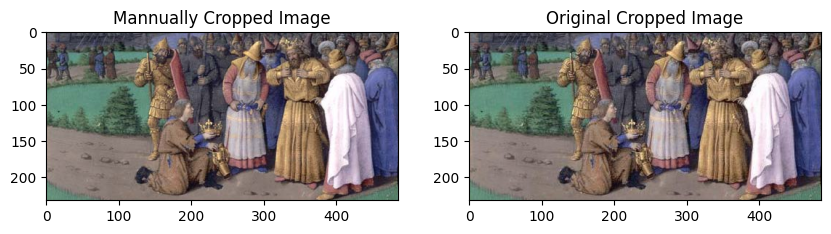

In [58]:
import deeplake
import matplotlib.pyplot as plt
ds = deeplake.load("hub://activeloop/wiki-art", read_only=True, verbose=False)


# Bounding box code test
crop = False

# Get image data
label = "../data/bounding-box-test/style_northern_renaissance_index_46497_subject_box_5_333_491_565.jpg"

# Get image index
name = label.split("/")[-1]

# Remove the .jpg
name = name.split(".")[0]
label = label.split("/")[-1]
label = label.split(".")[0]

# Split after index
name = name.split("index_")[-1]

# Check if bounding_box or subject_box is in the name
if "bounding_box" in name:
    name = name.split("_bounding_box")[0]

    # Get bounding box info
    coords = label.split("_bounding_box_")[-1].split("_")

    # Get the coordinates
    x1 = int(coords[0])
    y1 = int(coords[1])
    x2 = int(coords[2])
    y2 = int(coords[3])

    # Set crop to true
    crop = True

elif "subject_box" in name:
    name = name.split("_subject_box")[0]

    # Get bounding box info
    coords = label.split("_subject_box_")[-1].split("_")

    # Get the coordinates
    x1 = int(coords[0])
    y1 = int(coords[1])
    x2 = int(coords[2])
    y2 = int(coords[3])

    # Set crop to true
    crop = True

# Change name to int
name = int(name)

# Get image from ds
img = ds.images[name].numpy()

# If crop is true, crop the image
if crop:
    img = img[y1:y2, x1:x2]


# Get label
label = ds.labels[name].data()["text"][0]

# Make 2,1 plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show image
ax[0].imshow(img)
ax[0].set_title("Mannually Cropped Image")

# Reading precropped image
cropped_image = plt.imread('../data/bounding-box-test/style_northern_renaissance_index_46497_subject_box_5_333_491_565.jpg')
ax[1].imshow(cropped_image)
ax[1].set_title("Original Cropped Image")

plt.show()
